In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [27]:
df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update_median.csv')
df.shape  

(8494, 23)

In [28]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_num', 'Cabin_port', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported'],
      dtype='object')

#### scaler

In [29]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = \
# train_test_split(df.drop(['PassengerId','Transported','Name'],axis=1),df['Transported'], test_size=0.2, random_state=42)


#### minxax scaler

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./kaggle/input/spaceship-titanic/train_update_median.csv')

def selectscaler(scaler_name):
    global X_train,X_test,y_train,y_test
    
    X_train, X_test, y_train, y_test = \
    train_test_split(df.drop(['PassengerId','Transported','Name'],axis=1),df['Transported'], test_size=0.2, random_state=42)

    if scaler_name == 'StandardScaler':
        #StandardScaler
        scaler = StandardScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('StandardScaler Results')
    
    elif scaler_name == "MinMaxScaler":
        # MinMaxScaler
        scaler = MinMaxScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        return print('MinMaxScaler Results')

    elif scaler_name == "RobustScaler":
        # RobustScaler
        scaler = RobustScaler()
        columns = list(X_train.columns)

        X_train_minmax = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_minmax, columns = columns)

        X_test_minmax = scaler.transform(X_test)
        X_test = pd.DataFrame(X_test_minmax, columns = columns)
        
        return print('RobustScaler Results')
    else:
        return print('Results not scaled, Please use : StandardScaler,MinMaxScaler,RobustScaler')

selectscaler('MinMaxScaler')

MinMaxScaler Results


#### 3-2 모델

In [8]:
# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.get_params()

### XGboost guide
[kaggle guide](https://www.kaggle.com/code/azminetoushikwasi/xgboost-wrangling-with-hyperparameters-guide)

Fitting 5 folds for each of 1872 candidates, totalling 9360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': array([0.6, 0.7, 0.8]),
                         'gamma': [0.5, 1, 1.5],
                         'learning_rate': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17]),
                         'max_depth': array([5, 6, 7, 8]),
                         'n_estimators': [100, 130],
                         'objective': ['binary:logistic'], 'random_state': [42],
                         'subsample': array([0.7, 0.8])},
             verbose=2)

best_params :  {'colsample_bytree': 0.6, 'gamma': 1.5, 'learning_rate': 0.060000000000000005, 'max_depth': 7, 'n_estimators': 130, 'objective': 'binary:logistic', 'random_state': 42, 'subsample': 0.7999999999999999}
best_score_ :  0.809860191317145
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       861
           1       0.80      0.81      0.81       838

    accuracy                           0.81      1699
   macro avg       0.81      0.81      0.81      1699
weighted avg       0.81      0.81      0.81      1699



C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


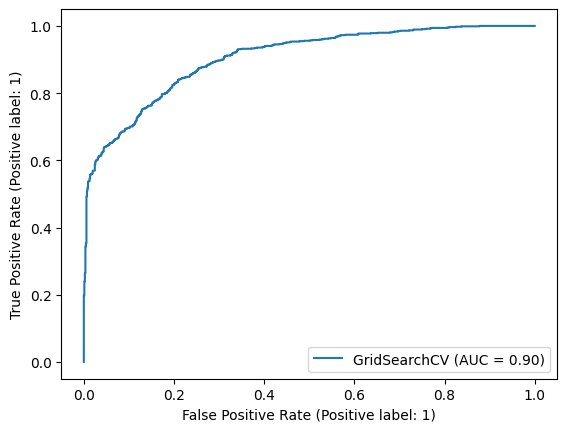

In [31]:
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

from MyModule import girdcvconv as gc


estimator = XGBClassifier()

learning_rate_list = np.arange(0.05,0.18,0.01)
max_depth_list =  np.arange(5, 9)
subsample_list = np.arange(0.7, 0.8, 0.1)
colsample_bytree_list = np.arange(0.6, 0.8, 0.1)

objective_list =  ['binary:logistic'] 

n_estimators_list = [100, 130]
gamma_list =  [0.5, 1, 1.5]

parameter={
    
    'learning_rate' : learning_rate_list,
    'max_depth' : max_depth_list,
    'subsample' : subsample_list,
    'colsample_bytree' : colsample_bytree_list,

    'objective' : objective_list,

    'n_estimators' : n_estimators_list,
    "gamma" : gamma_list,

    'random_state': [42]
}

model = GridSearchCV(estimator, param_grid=parameter, cv=5, verbose=2, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈

model.fit(X_train, y_train)

print('best_params : ', model.best_params_)
print('best_score_ : ', model.best_score_)


pred = model.predict(X_test)
test_score = roc_auc_score(y_test,pred)

print(classification_report(y_test, pred, target_names=["0","1"]))

plot_roc_curve(model, X_test, y_test)

gc.paramsTocsv(data_name='train_update_median', scaler='MinMaxScaler', model_name='XGBClassifier', best_params=model.best_params_, best_score=model.best_score_, testset_score=test_score)

In [32]:
import joblib
# model save
# 모델 저장
model_path = './' + 'modelsave/' +'train_update_median' +'.model'
# model.save_model(model_path)
joblib.dump(model, open(model_path, 'wb'))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib

def fillnullclassifier(column_name):

    global df_update

    df_column_name = df_train[df_train[column_name].isnull()]

    df_train01 = df_train.dropna(subset=[column_name])

    X_train, X_test, y_train, y_test = train_test_split(df_train01.drop(['PassengerId',column_name,'Name'],axis=1),df_train01[column_name], test_size=0.2, random_state=42)
    
    model_path = './' + 'xgb_model/' +column_name +'.model'
    model = joblib.load(open(model_path,'rb'))
    
    # eval_set = [(X_test, y_test)]
    # model.fit(X_train, y_train, eval_set=eval_set, verbose=False)#, verbose=True

    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    print(acc)
    
    df_column_name_null = df_column_name.drop(column_name,axis=1)

    pred = model.predict(df_column_name_null.drop(['PassengerId','Name'],axis=1))

    df_column_name[column_name] = pred

    df_update = pd.concat([df_train01,df_column_name],axis=0)

fillnullclassifier('Destination')




              precision    recall  f1-score   support

           0       0.81      0.80      0.80       851
           1       0.80      0.81      0.80       848

    accuracy                           0.80      1699
   macro avg       0.80      0.80      0.80      1699
weighted avg       0.80      0.80      0.80      1699



C:\Users\deepBlue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


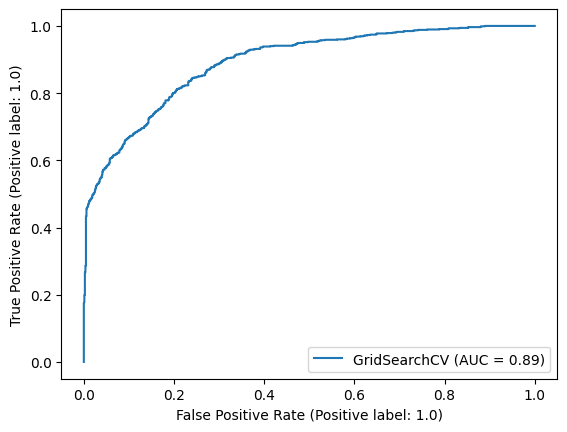

In [10]:
# test_score = roc_auc_score(y_test,pred)

# print(classification_report(y_test, pred, target_names=["0","1"]))

# plot_roc_curve(model, X_test, y_test)

# gc.paramsTocsv(data_name='train_update', scaler='StandardScaler', model_name='XGBClassifier', best_params=model.best_params_, best_score=model.best_score_, testset_score=test_score)

In [7]:
## 예시
# from MyModule import girdcvconv as gc
# best_params =  {'criterion': 'gini', 'max_depth': 19, 'min_impurity_decrease': 0.0, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
# best_score_ =  0.7113550153749467
# gc.paramsTocsv(data_name='obesity', scaler='StandardScaler', model_name='DecisionTreeClassifier', best_params=best_params, best_score=best_score_)

In [42]:
# 생성된 dataframe 확인
import pandas as pd
df = pd.read_csv('./modeldata/space01.csv')
df 

,date,model_name,scaler,best_score,criterion,max_depth,min_impurity_decrease,min_samples_split,min_weight_fraction_leaf,random_state,splitter
0,2022-12-06 14:59:29,DecisionTreeClassifier,MinMaxScaler,0.790728,gini,7,0.0,15,0.0,42,best


In [10]:
# 특정 데이터프레임 선택
import pandas as pd
from MyModule import selectparameter as sp

bestparams = sp.selectparam('obesity',0)
print(bestparams)

{'criterion': ['gini'], 'max_depth': [19], 'min_impurity_decrease': [0.0], 'min_samples_split': [2], 'min_weight_fraction_leaf': [0.0], 'random_state': [42], 'splitter': ['best']}


In [ ]:
#DecisionTreeClassifier 최적의 파라미터를 바로 삽입
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()
model = GridSearchCV(estimator, param_grid=bestparams, cv=3, verbose=1, n_jobs=-1, refit=True)
# verbose 출력 실행 모듈
model.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

[0]	validation_0-logloss:0.59062
[1]	validation_0-logloss:0.53494
[2]	validation_0-logloss:0.50013
[3]	validation_0-logloss:0.47849
[4]	validation_0-logloss:0.46413
[5]	validation_0-logloss:0.45035
[6]	validation_0-logloss:0.44229
[7]	validation_0-logloss:0.43393
[8]	validation_0-logloss:0.42835
[9]	validation_0-logloss:0.42488
[10]	validation_0-logloss:0.42497
[11]	validation_0-logloss:0.42037
[12]	validation_0-logloss:0.41680
[13]	validation_0-logloss:0.41381
[14]	validation_0-logloss:0.41457
[15]	validation_0-logloss:0.41332
[16]	validation_0-logloss:0.41302
[17]	validation_0-logloss:0.41301
[18]	validation_0-logloss:0.41362
[19]	validation_0-logloss:0.41224
[20]	validation_0-logloss:0.41118
[21]	validation_0-logloss:0.41054
[22]	validation_0-logloss:0.41003
[23]	validation_0-logloss:0.41013
[24]	validation_0-logloss:0.40962
[25]	validation_0-logloss:0.40966
[26]	validation_0-logloss:0.40947
[27]	validation_0-logloss:0.40973
[28]	validation_0-logloss:0.40913
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.7975279576221307

confusion_matrix : 
 [[688 163]
 [181 667]]


<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

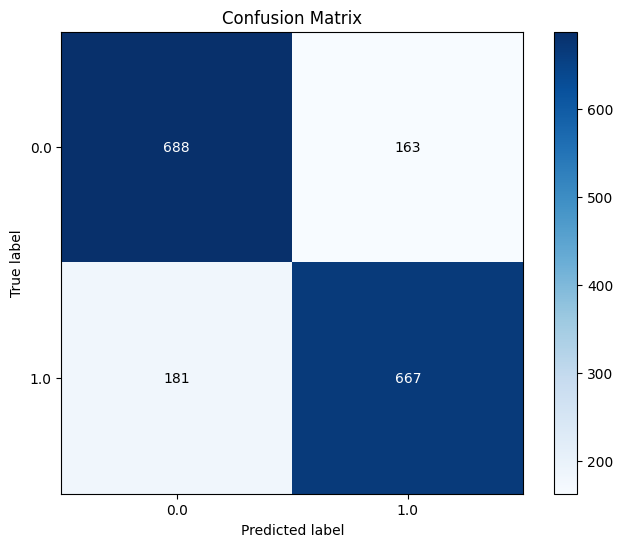

In [43]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set)#, verbose=True

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()